<a href="https://colab.research.google.com/github/newgabo/TP2-AA/blob/master/TP2_AA_Modelos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Si van a realizar el TP con canto Mongol, que sea bien arriba!

https://open.spotify.com/track/4JvM2JzkfRjMYy9pexVeRV?si=6N0bTnkHQOGm-GRvMv7n1A

Import's

In [52]:
from io import BytesIO

import os
import sys
import pickle
import math
import random
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import librosa
import glob

import scipy.io.wavfile

from shutil import copyfile

from IPython.display import Audio

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, fbeta_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Notación Científica a Decimal
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Features

In [43]:
# Desde nuestro repo!
github_Link_ = 'https://github.com/newgabo/TP2-AA/blob/master/feat_numbers.p?raw=true'
file_ = BytesIO(requests.get(github_Link_).content)
df_features = pickle.load(file_)

df_features.shape

(23666, 81)

In [44]:
df_features.head(3)

mfcc_0_mean  mfcc_1_mean  ...                        file  group
0     -447.013       82.107  ...  zero/b087aa0e_nohash_3.wav  train
1     -467.465      106.486  ...  zero/1a892463_nohash_1.wav  train
2     -387.342      103.399  ...  zero/fb2f3242_nohash_0.wav  train

[3 rows x 81 columns]

In [ ]:
# Algunos controles para yo entender la data nuevamente
df_features.groupby('target').count()

mfcc_0_mean  mfcc_1_mean  mfcc_2_mean  ...  ddenergy_std  file  group
target                                         ...                           
eight          2352         2352         2352  ...          2352  2352   2352
five           2357         2357         2357  ...          2357  2357   2357
four           2372         2372         2372  ...          2372  2372   2372
nine           2364         2364         2364  ...          2364  2364   2364
one            2370         2370         2370  ...          2370  2370   2370
seven          2377         2377         2377  ...          2377  2377   2377
six            2369         2369         2369  ...          2369  2369   2369
three          2356         2356         2356  ...          2356  2356   2356
two            2373         2373         2373  ...          2373  2373   2373
zero           2376         2376         2376  ...          2376  2376   2376

[10 rows x 80 columns]

In [ ]:
df_features.groupby('group').count()

mfcc_0_mean  mfcc_1_mean  mfcc_2_mean  ...  ddenergy_std  target   file
group                                              ...                             
testing            2552         2552         2552  ...          2552    2552   2552
train             18620        18620        18620  ...         18620   18620  18620
validation         2494         2494         2494  ...          2494    2494   2494

[3 rows x 80 columns]

# Modelos

In [45]:
df_train = df_features[df_features['group'] == 'train']

del df_train['group']
del df_train['file']
len(df_train.index)

18620

In [46]:
features = df_train.loc[:, df_train.columns != 'target'].columns
target = 'target'

x_train, y_train = df_train[features].values, df_train[target].values

In [47]:
# Validation Set
df_validation = df_features[df_features['group'] == 'validation']

del df_validation['group']
del df_validation['file']
len(df_validation.index)

2494

In [48]:
x_validation, y_validation = df_validation[features].values, df_validation[target].values

In [49]:
# Test Set
df_test = df_features[df_features['group'] == 'testing']

del df_test['group']
del df_test['file']
len(df_test.index)

2552

In [50]:
x_test, y_test = df_test[features].values, df_test[target].values

### Bagging Parameters


*   n_estimators
*   max_features
*   oob_score

### Tree-specific Parameters


*   max_depth
*   min_samples_split
*   min_samples_leaf
*   class_weight (balanced)



### Naive Bayes

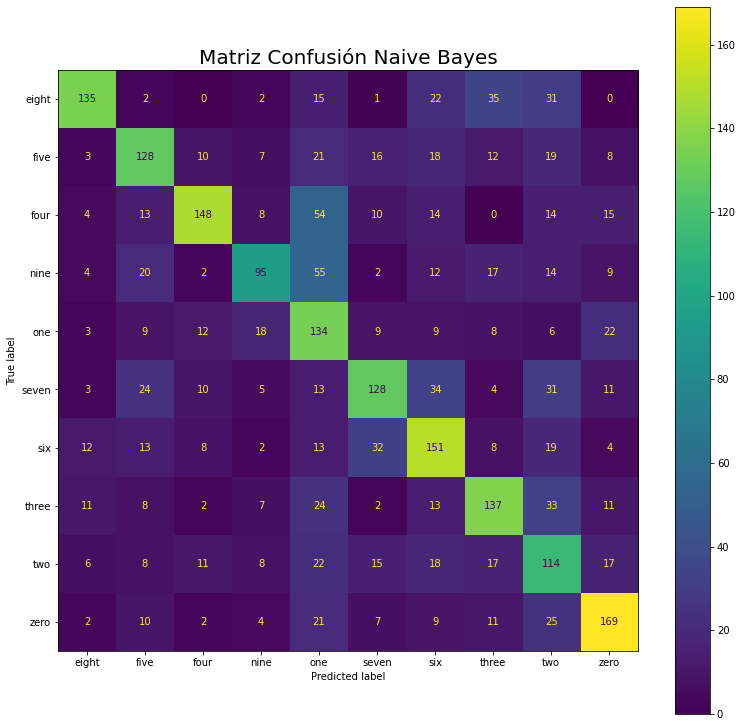

Accuracy Training : 0.541
Accuracy Test: 0.537


In [ ]:
clf_nb_ = GaussianNB()
clf_nb_.fit(x_train, y_train)

fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_nb_, x_validation, y_validation, ax = ax,values_format='.0f')
plt.title("Matriz Confusión Naive Bayes", size=20)
plt.show()

print("Accuracy Training : {:.3f}".format(clf_nb_.score(x_train, y_train)))
print("Accuracy Test: {:.3f}".format(clf_nb_.score(x_validation, y_validation)))

              precision    recall  f1-score   support

       eight       0.74      0.56      0.63       243
        five       0.54      0.53      0.54       242
        four       0.72      0.53      0.61       280
        nine       0.61      0.41      0.49       230
         one       0.36      0.58      0.45       230
       seven       0.58      0.49      0.53       263
         six       0.50      0.58      0.54       262
       three       0.55      0.55      0.55       248
         two       0.37      0.48      0.42       236
        zero       0.64      0.65      0.64       260

    accuracy                           0.54      2494
   macro avg       0.56      0.54      0.54      2494
weighted avg       0.57      0.54      0.54      2494



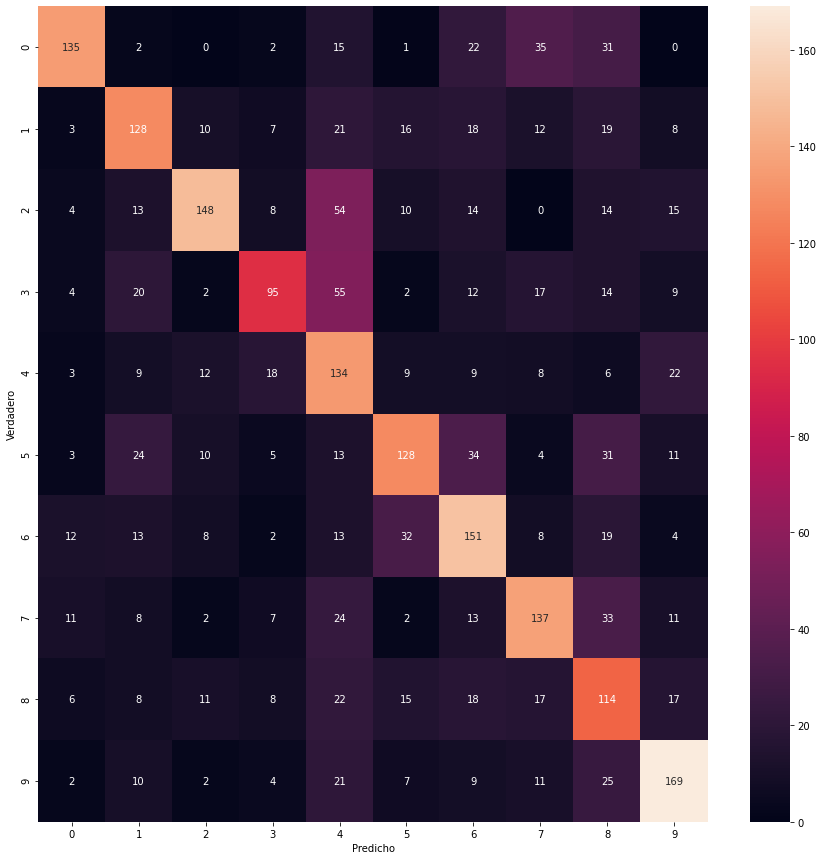

In [ ]:
# agregue el clasification report por clase, despues vemos si queda o no
# por hi esta bueno agregar otra medida mas de performance a parte del accuracy, para ir
# comparando.... en una de las preguntas por mail recomendaron f1 y accuracy... tendriamos que definirlo
# por otro lado nos sirve para sacar las medidas de performance por clase y comparar con ruido y sin ruido

# tambien otra version de la martiz de confusion, solo para probar, pero es mejor el anterior...
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

y_validation_pred= clf_nb_.predict(x_validation)

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(confusion_matrix(y_validation, y_validation_pred),annot=True,fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')


print(classification_report(y_validation,y_validation_pred))

### Random Forest

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.6min finished


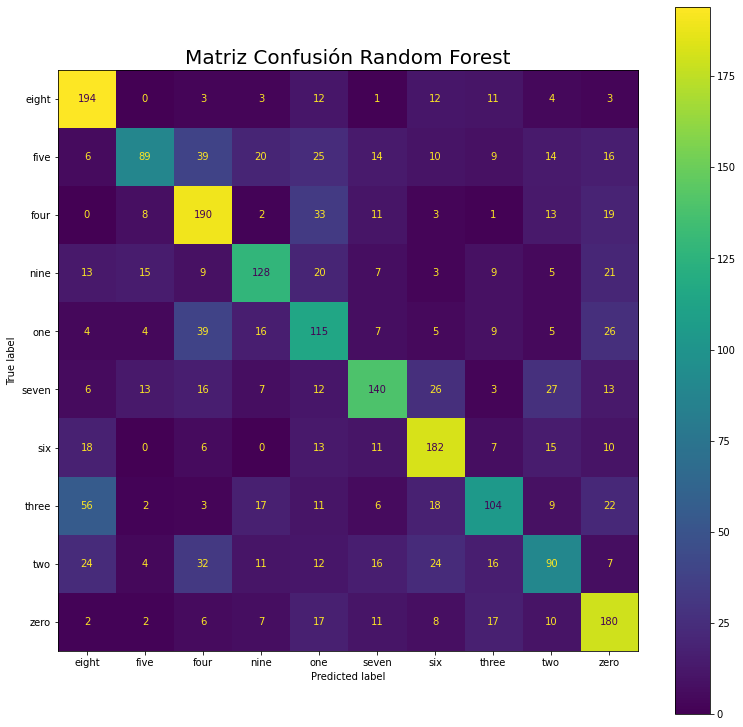

Accuracy training : 0.577
Accuracy Validation: 0.566
Best Random Forest Score 0.559 with params {'n_estimators': 50, 'max_features': 6, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}


In [53]:
#parameters = {'n_estimators':range(100, 200, 500), 'max_depth':range(5,10,15), 'bootstrap':[True, False], 'max_features': [6, 8, 10]}
parameters = {'n_estimators':[50,100,150], 
              'criterion' :['gini', 'entropy'],
              'max_depth':range(5,15,1), 
              'bootstrap':[True, False], 
              'max_features': [6, 8, 10]}

clf_rf_ = RandomizedSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, n_iter=15, scoring='accuracy',verbose=2, cv=None)
clf_rf_.fit(x_train, y_train)

clf_rf_be_ = clf_rf_.best_estimator_
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_rf_be_, x_validation, y_validation, ax = ax,values_format='.0f')
plt.title("Matriz Confusión Random Forest", size=20)
plt.show()


print("Accuracy training : {:.3f}".format(clf_rf_be_.score(x_train, y_train)))
print("Accuracy Validation: {:.3f}".format(clf_rf_be_.score(x_validation, y_validation)))
print("Best Random Forest Score {0:.3f} with params {1}".format(clf_rf_.best_score_, clf_rf_.best_params_))

In [ ]:
# medidas de performance 
y_validation_pred= clf_rf_.predict(x_validation)

print(classification_report(y_validation,y_validation_pred))

              precision    recall  f1-score   support

       eight       0.72      0.78      0.75       243
        five       0.69      0.54      0.60       242
        four       0.65      0.73      0.69       280
        nine       0.65      0.62      0.64       230
         one       0.50      0.59      0.54       230
       seven       0.64      0.63      0.64       263
         six       0.77      0.69      0.73       262
       three       0.60      0.62      0.61       248
         two       0.61      0.52      0.56       236
        zero       0.64      0.71      0.68       260

    accuracy                           0.65      2494
   macro avg       0.65      0.64      0.64      2494
weighted avg       0.65      0.65      0.65      2494



### Gradient Boosting 

1.   Initial Model (weak estimator)
2.   New Model fits to residuals
3.   New additive model
4.   Repeat n times or until error is small enough
5.   Final additive model

A diferencia de los modelos por Votación, en Gradient Boosting los estimadores no se combinan mediante votación o promedios, sino por suma. Se debe a que el primer modelo se ajusta a la variable objetivo y el resto son estimaciones de los errores residuales.

Parámetros:
*   n_estimators
*   learning_rate
*   max_depth
*   min_samples_split
*   min_samples_leaf
*   max_features

En Gradient Boosting se recomiendan utilizar todos los parámetros.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.1min finished


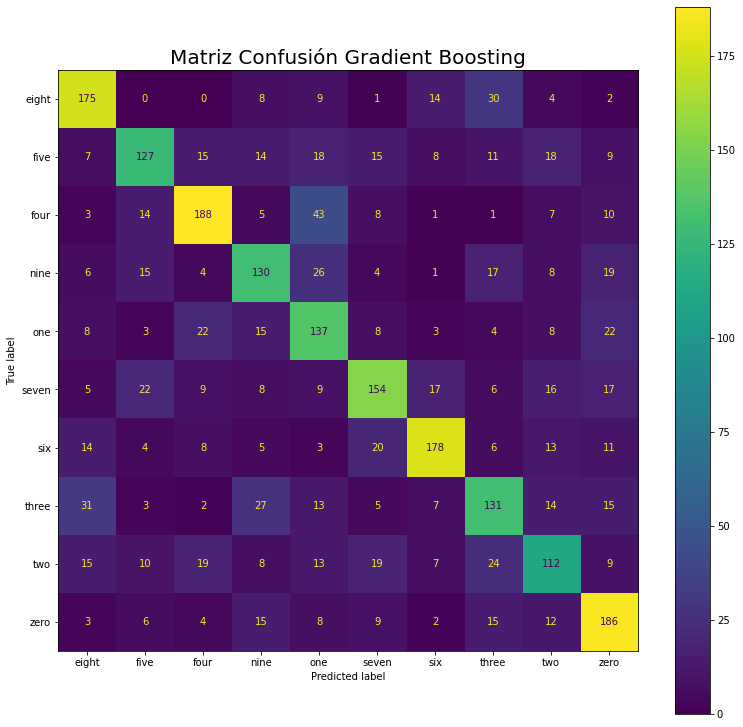

Accuracy training : 0.667
Accuracy Validation: 0.609
Best Gradient Boosting Score 0.615 with params {'n_estimators': 150, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.01}


In [56]:
"""
parameters = {'n_estimators':range(100, 200), 'learning_rate': np.linspace(0 ,0.1), 'max_features': [6, 8, 10], 
              'n_iter_no_change': [5], 'tol': [0.01]} 

parameters = {'n_estimators':range(100, 200), 
              'learning_rate': [0 ,0.1], 
              'n_iter_no_change': [5], 'tol': [0.01]}    
"""
     
parameters = {
    "learning_rate": [0, 0.01],
    "max_depth": [3,5,8],
    'max_features': [6, 8, 10],
    "n_estimators": [50,100,150]
    }          
clf_gb_ = RandomizedSearchCV(GradientBoostingClassifier(), parameters, n_jobs=-1, scoring='accuracy',verbose=2,cv=None)
clf_gb_.fit(x_train, y_train)

clf_gb_be_ = clf_gb_.best_estimator_
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_gb_, x_validation, y_validation, ax = ax,values_format='.0f')
plt.title("Matriz Confusión Gradient Boosting", size=20)
plt.show()

print("Accuracy training : {:.3f}".format(clf_gb_.score(x_train, y_train)))
print("Accuracy Validation: {:.3f}".format(clf_gb_.score(x_validation, y_validation)))
print("Best Gradient Boosting Score {0:.3f} with params {1}".format(clf_gb_.best_score_, clf_gb_.best_params_))

In [72]:
# medidas de performance 
from sklearn.metrics import classification_report
y_validation_pred= clf_gb_.predict(x_validation)

print(classification_report(y_validation,y_validation_pred))
accuracy_score(y_validation,y_validation_pred, normalize=True)

f1_score(y_validation,y_validation_pred, average='macro')

              precision    recall  f1-score   support

       eight       0.66      0.72      0.69       243
        five       0.62      0.52      0.57       242
        four       0.69      0.67      0.68       280
        nine       0.55      0.57      0.56       230
         one       0.49      0.60      0.54       230
       seven       0.63      0.59      0.61       263
         six       0.75      0.68      0.71       262
       three       0.53      0.53      0.53       248
         two       0.53      0.47      0.50       236
        zero       0.62      0.72      0.66       260

    accuracy                           0.61      2494
   macro avg       0.61      0.61      0.61      2494
weighted avg       0.61      0.61      0.61      2494



0.6052048606795786

### Multilayer Perceptron

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 19.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


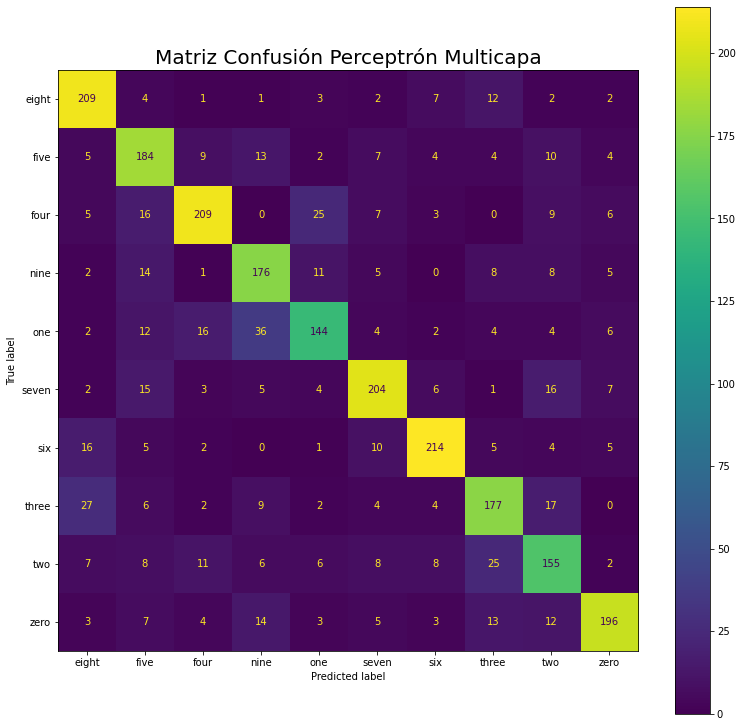

Accuracy training : 0.857
Accuracy Validation: 0.749
Best Multilayer Perceptron Score 0.759 with params {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

clf_mlp_ = RandomizedSearchCV(MLPClassifier(max_iter=100), parameter_space, n_jobs=-1, scoring='accuracy', verbose=2, cv=None)
clf_mlp_.fit(x_train, y_train)

clf_mlp_be_ = clf_mlp_.best_estimator_

# En el TP se menciona lo siguiente:
# Elegir el numero de neuronas de la capa utilizando Random Search
# por lo tanto, deberíamos hacer uso de RandomizedSearchCV()? Yo venía haciendo uso de GridSearch()
#
# Qué opinan?
#
# en la ultima clase tengo anotado que dijo que no usemos el CV, que usemos solo el randomsearch
# creo que era por el tema de hacer la division entre train y validation
# despues lo charlamos todos juntos si quieren


fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(clf_mlp_, x_validation, y_validation, ax = ax,values_format='.0f')
plt.title("Matriz Confusión Perceptrón Multicapa", size=20)
plt.show()

print("Accuracy training : {:.3f}".format(clf_mlp_.score(x_train, y_train)))
print("Accuracy Validation: {:.3f}".format(clf_mlp_.score(x_validation, y_validation)))
print("Best Multilayer Perceptron Score {0:.3f} with params {1}".format(clf_mlp_.best_score_, clf_mlp_.best_params_))

In [ ]:
# medidas de performance 
y_validation_pred= clf_mlp_.predict(x_validation)

print(classification_report(y_validation,y_validation_pred))


              precision    recall  f1-score   support

       eight       0.75      0.86      0.80       243
        five       0.68      0.76      0.72       242
        four       0.81      0.75      0.78       280
        nine       0.68      0.77      0.72       230
         one       0.72      0.63      0.67       230
       seven       0.80      0.78      0.79       263
         six       0.85      0.82      0.83       262
       three       0.71      0.71      0.71       248
         two       0.65      0.66      0.66       236
        zero       0.84      0.75      0.80       260

    accuracy                           0.75      2494
   macro avg       0.75      0.75      0.75      2494
weighted avg       0.75      0.75      0.75      2494



# Comparación performance

Text(0.5, 1.0, 'Comparación Modelos: Train&Validation Performance')

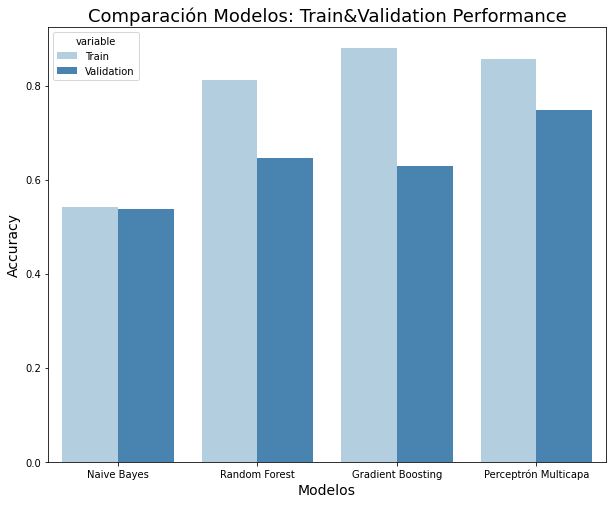

In [ ]:
dict_performance_ = {'Modelo': ['Naive Bayes', 'Random Forest', 'Gradient Boosting', 'Perceptrón Multicapa'], 
     'Train': [clf_nb_.score(x_train, y_train), 
               clf_rf_be_.score(x_train, y_train),
               clf_gb_.score(x_train, y_train),
               clf_mlp_.score(x_train, y_train)
               ], 
     'Validation':  [clf_nb_.score(x_validation, y_validation),
               clf_rf_be_.score(x_validation, y_validation),
               clf_gb_.score(x_validation, y_validation),
               clf_mlp_.score(x_validation, y_validation)
               ]}
df_performance_ = pd.DataFrame(data=dict_performance_)

plt.figure(figsize=(10, 8))
sns.barplot(x="Modelo", y="value", hue="variable", data=pd.melt(df_performance_, id_vars=['Modelo']), palette="Blues")
plt.ylabel("Accuracy", size=14)
plt.xlabel("Modelos", size=14)
plt.title("Comparación Modelos: Train&Validation Performance", size=18)

# Evaluación de Ruido

Comienzo por Instalar .rar para descomprimir los archivos de Test

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Testing.rar to Testing.rar


In [ ]:
!mkdir testing
!unrar x "/content/Testing.rar" "/content/testing/" 


mkdir: cannot create directory ‘testing’: File exists

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Testing.rar

Creating    /content/testing/Testing                                  OK
Creating    /content/testing/Testing/four                             OK
Extracting  /content/testing/Testing/four/563aa4e6_nohash_0.wav            0%  OK 
Extracting  /content/testing/Testing/four/af130f12_nohash_0.wav            0%  OK 
Extracting  /content/testing/Testing/four/863880b7_nohash_0.wav            0%  OK 
Extracting  /content/testing/Testing/four/37fc5d97_nohash_0.wav            0%  OK 
Extracting  /content/testing/Testing/four/964e8cfd_nohash_3.wav            0%  OK 
Extracting  /content/testing/Testing/four/91223b83_nohash_0.wav            0%  OK 
Extracting  /content/testing/Testing/four/b83c1acf_nohash_3.wav            0%  OK 
Extracting  /content/testing/Testing/four/80c45ed

Pruebas para sumar Ruido

In [ ]:
#######################################################################################################
# from https://stackoverflow.com/questions/33933842/how-to-generate-noise-in-frequency-range-with-numpy
#######################################################################################################
def fftnoise(f):
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real
    

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate))
    f = np.zeros(samples)
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)
#######################################################################################################
#######################################################################################################
#######################################################################################################

In [ ]:
# Selecciono un audio de los de Test Original
audio_numero = "/content/testing/Testing/eight/096456f9_nohash_0.wav"
x, fs = librosa.core.load(audio_numero, sr=None)
Audio(x, rate=fs)

In [ ]:
# Genero Ruido
t = np.linspace(0,1,44100)
audio = np.sin(1200*t)

ruido = np.random.normal(size=audio.shape)
senal = ruido + audio

Audio(senal, rate=44100)

In [ ]:
# Otra prueba para hacerlo del mismo sr que los audios de nuestros Set's
t = np.linspace(0,1,16000)
audio = np.sin(1200*t)

ruido = np.random.normal(size=audio.shape)
senal = ruido + audio

Audio(senal, rate=16000)

In [ ]:
# A lo bruto...
audio_con_ruido = audio + x

#audio_con_ruido = x[5000:5000+len(senal)]
#result = x + senal
#Audio(x + audio)
#Audio(audio_con_ruido, rate=16000)
#Audio(audio_con_ruido)

Audio(audio_con_ruido, rate=44100)

In [ ]:
# Generación de Ruido
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=4000, max_freq = 12000, samples=len(x), samplerate=fs)*10
noise_clip = noise[:fs*noise_len]
audio_con_ruido = x+noise

Audio(data=audio_con_ruido, rate=fs)

In [ ]:
def calculate_features(filename, n_mfcc=12,delta=True,deltadelta=True,energy=True, summary_fn = [np.mean, np.std], summary_names=['mean','std']):
  #Abro el archivo:
  x, sr = librosa.core.load(filename,sr=None)
  
  #Calculo MFCCs
  features = librosa.feature.mfcc(x,sr=sr,n_mfcc=n_mfcc)
  feat_names = ['mfcc_{}'.format(i) for i in range(n_mfcc)]
  #Calculo energia:
  if energy:
    energy = librosa.feature.rmse(x)
    features = np.concatenate([features,energy])
    feat_names = feat_names + ['energy']
  #Aplico media y desvio estandar por defecto
  summary_features = np.concatenate([fn(features,axis=1) for fn in summary_fn])
  feat_names = ['{}_{}'.format(name_i,summ_i) for summ_i in summary_names for name_i in feat_names]
  
  #Lo mismo con los delta
  if delta:
    deltafeatures = np.diff(features)
    summary_features = np.concatenate([summary_features,np.concatenate([fn(deltafeatures,axis=1) for fn in summary_fn])])
    d_names = ['d{}'.format(name) for name in feat_names]
  else:
    d_names = []

  #Y con los delta de segundo orden
  if deltadelta:
    deltadeltafeatures = np.diff(features,n=2)
    summary_features = np.concatenate([summary_features,np.concatenate([fn(deltadeltafeatures,axis=1) for fn in summary_fn])]) 
    dd_names = ['dd{}'.format(name) for name in feat_names]
  else:
    dd_names = []

  feat_names = feat_names + d_names + dd_names
  
  return summary_features, feat_names

# Lista de Audios de Validación
zero_wavs = glob.glob('/content/testing/Testing/zero/*.wav')
one_wavs = glob.glob('/content/testing/Testing/one/*.wav')
two_wavs = glob.glob('/content/testing/Testing/two/*.wav')
three_wavs = glob.glob('/content/testing/Testing/three/*.wav')
four_wavs = glob.glob('/content/testing/Testing/four/*.wav')
five_wavs = glob.glob('/content/testing/Testing/five/*.wav')
six_wavs = glob.glob('/content/testing/Testing/six/*.wav')
seven_wavs = glob.glob('/content/testing/Testing/seven/*.wav')
eight_wavs = glob.glob('/content/testing/Testing/eight/*.wav')
nine_wavs = glob.glob('/content/testing/Testing/nine/*.wav')

vec_num = [['zero',zero_wavs],
          ['one',one_wavs],
          ['two',two_wavs], 
          ['three',three_wavs],
          ['four',four_wavs],
          ['five', five_wavs], 
          ['six', six_wavs],
          ['seven',seven_wavs],
          ['eight',eight_wavs],
          ['nine',nine_wavs]]

## Función para Ruido en Test

No lo pasé a función todavía, pero cuando tengamos la de ambientes, podemos mezclar todo en una. Por ahora, va como ejecución directa... 

In [ ]:
# Voy a arrancar por generar una carpeta donde guardar el set de validación nuevo
!rm -rf '/content/testing/testing_gaussian_noise/'
os.mkdir('/content/testing/testing_gaussian_noise/')

# Y dentro, para mantener la misma estructura y saber a que Clase pertenece, genero las carpetas del subdir()
for numero in vec_num:
  os.mkdir('/content/testing/testing_gaussian_noise/'+numero[0])

In [ ]:
for numero in vec_num:
  n_to_noise_ = math.floor(0.2*len(numero[1])) # obtengo la cantidad de audios a los que le voy a agregar ruido
  print("Agrego ruido a {0} elementos de la Clase {1}".format(n_to_noise_, numero[0]))
  random.shuffle(numero[1]) # mezclo los audios dentro de la lista

  j = 0 # bandera para la cantidad de audios a los que agregar ruido
  for i in range(len(numero[1])): # voy a recorrer los audios
    if j <= n_to_noise_:

      ###
      # Generacion de Ruido
      audio_numero = numero[1][i]
      x, fs = librosa.core.load(audio_numero, sr=None)
      noise_len = 2 # seconds
      noise = band_limited_noise(min_freq=4000, max_freq = 12000, samples=len(x), samplerate=fs)*10
      noise_clip = noise[:fs*noise_len]
      audio_con_ruido = x+noise
      ###

      # le agrego el prefijo rg de ruido gaussiano para despues identificarlo en el dataframe
      nombre_audio_ = audio_numero.split('/')[4]+"/rg_"+audio_numero.split('/')[5] # extraigo el nombre original del file + clase correspondiente
      # Voy a guardar entonces en cada carpeta los audios
      scipy.io.wavfile.write("/content/testing/testing_gaussian_noise/"+nombre_audio_, fs, audio_con_ruido)
      j+=1
    else:
      # cuando no armo ruido, copio los audios originales directamente
      copyfile(numero[1][i], "/content/testing/testing_gaussian_noise/"+numero[1][i].split('/')[4]+"/"+numero[1][i].split('/')[5])

Agrego ruido a 50 elementos de la Clase zero
Agrego ruido a 49 elementos de la Clase one
Agrego ruido a 52 elementos de la Clase two
Agrego ruido a 53 elementos de la Clase three
Agrego ruido a 50 elementos de la Clase four
Agrego ruido a 54 elementos de la Clase five
Agrego ruido a 48 elementos de la Clase six
Agrego ruido a 47 elementos de la Clase seven
Agrego ruido a 51 elementos de la Clase eight
Agrego ruido a 51 elementos de la Clase nine


In [ ]:
# Finalmente Zippeo toda la carpeta que contiene los audios de Testing con el %ruido agregado.
!zip -r "/content/testing/testing_gaussian_noise.zip" "/content/testing/testing_gaussian_noise"

# Y descargo..
from google.colab import files
files.download("/content/testing/testing_gaussian_noise.zip")

  adding: content/testing/testing_gaussian_noise/ (stored 0%)
  adding: content/testing/testing_gaussian_noise/four/ (stored 0%)
  adding: content/testing/testing_gaussian_noise/four/563aa4e6_nohash_0.wav (deflated 35%)
  adding: content/testing/testing_gaussian_noise/four/af130f12_nohash_0.wav (deflated 18%)
  adding: content/testing/testing_gaussian_noise/four/863880b7_nohash_0.wav (deflated 28%)
  adding: content/testing/testing_gaussian_noise/four/37fc5d97_nohash_0.wav (deflated 26%)
  adding: content/testing/testing_gaussian_noise/four/964e8cfd_nohash_3.wav (deflated 22%)
  adding: content/testing/testing_gaussian_noise/four/91223b83_nohash_0.wav (deflated 60%)
  adding: content/testing/testing_gaussian_noise/four/b83c1acf_nohash_3.wav (deflated 21%)
  adding: content/testing/testing_gaussian_noise/four/80c45ed6_nohash_0.wav (deflated 4%)
  adding: content/testing/testing_gaussian_noise/four/b49caed3_nohash_4.wav (deflated 4%)
  adding: content/testing/testing_gaussian_noise/four/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Comienzo por probar los mejores modelos con performance en Validation para que corran en Test sin y con ruido respectivamente...

In [ ]:
modelos = [('Naive Bayes', 0), ('Random Forest', 0), ('Gradient Boosting', 0), ('Multilayer Perceptron', 0)]
acc_test = {} # Voy a armar un diccionario
for modelo in modelos:
  for noise in noise_levels_:
    print(modelo, noise)

NameError: ignored

...

## Matriz de Confusión para Ruidos

In [ ]:
# Voy a hacer uso de una Matriz de Confusión "interactiva"
! pip -q install pygal

     |████████████████████████████████| 133kB 3.4MB/s 


In [ ]:
import pygal
from IPython.display import display, HTML
from pygal.style import RedBlueStyle

Si bien es para ver las matrices de confusión cuando hagamos ruido, por ahora pruebo sobre lo realizado, solo para que vean si les parece incorporarlo. Aunque no logro hacer andar el tooltip acá en Colab.

In [ ]:
render_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = render_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

    
def plot_cm(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    dot_chart = pygal.Dot(interpolate='cubic', style=RedBlueStyle)
    dot_chart.force_uri_protocol = 'http'
    dot_chart.title = 'Matriz de Confusión'
    dot_chart.x_labels = labels
    dot_chart.x_title = "Predicho"
    dot_chart.y_title = "Real"
    for i in range(len(labels)):
        dot_chart.add(labels[i], cm[i,:])
    galplot(dot_chart)
    
plot_cm(y_validation, clf_mlp_be_.predict(x_validation))

In [ ]:
# subo los wavs de ruido ambiente
uploaded=files.upload()



Saving doing_the_dishes.wav to doing_the_dishes.wav
Saving dude_miaowing.wav to dude_miaowing.wav
Saving exercise_bike.wav to exercise_bike.wav
Saving pink_noise.wav to pink_noise.wav
Saving running_tap.wav to running_tap.wav
Saving white_noise.wav to white_noise.wav


In [ ]:

!mkdir background_noise

!mv "/content/doing_the_dishes.wav" "/content/background_noise"
!mv "/content/dude_miaowing.wav"  "/content/background_noise" 
!mv "/content/exercise_bike.wav" "/content/background_noise"
!mv "/content/pink_noise.wav" "/content/background_noise" 
!mv "/content/running_tap.wav" "/content/background_noise"
!mv "/content/white_noise.wav" "/content/background_noise" 

In [ ]:
# Selecciono un audio de los de Test Original
f_audio_numero = "/content/testing/Testing/five/022cd682_nohash_0.wav"
audio_numero, fs = librosa.core.load(f_audio_numero, sr=None)
Audio(audio_numero, rate=fs)

In [ ]:
f_audio_amb = "/content/background_noise/running_tap.wav"
audio_amb, fs = librosa.core.load(f_audio_amb, sr=None)
Audio(audio_amb, rate=fs)

In [ ]:
#mezclo ambos ruidos
audio_amb2 = audio_amb[5000:5000+len(audio_numero)]
senal= audio_amb2 + audio_numero
Audio(senal, rate=fs)

In [ ]:
ruido_amb_wavs = glob.glob('/content/background_noise/*.wav')
ruido_amb_wavs

['/content/background_noise/dude_miaowing.wav',
 '/content/background_noise/running_tap.wav',
 '/content/background_noise/exercise_bike.wav',
 '/content/background_noise/white_noise.wav',
 '/content/background_noise/doing_the_dishes.wav',
 '/content/background_noise/pink_noise.wav']

In [ ]:
# uso el codigo ya generado por cristian para generar las carpetas de backgrounf noise
!rm -rf '/content/testing/testing_background_noise/'
os.mkdir('/content/testing/testing_background_noise/')

# Y dentro, para mantener la misma estructura y saber a que Clase pertenece, genero las carpetas del subdir()
for numero in vec_num:
  os.mkdir('/content/testing/testing_background_noise/'+numero[0])

In [ ]:
for numero in vec_num:
  print (numero[1])
  n_to_noise_ = math.floor(0.2*len(numero[1])) # obtengo la cantidad de audios a los que le voy a agregar ruido
  print("Agrego ruido a {0} elementos de la Clase {1}".format(n_to_noise_, numero[0]))
  random.shuffle(numero[1]) # mezclo los audios dentro de la lista

 
  j = 0 # bandera para la cantidad de audios a los que agregar ruido
  for i in range(len(numero[1])): # voy a recorrer los audios
    if j <= n_to_noise_:

      ###
      # sumammos ruido ambiental
      audio_numero = numero[1][i]
      x, fs = librosa.core.load(audio_numero, sr=None)
      r2=random.choice(ruido_amb_wavs) # elijo un ruido ambiente el azar
      #print(r2)
      x2 , fs2 = librosa.core.load(r2, sr=None)
      x2 = x2[5000:5000+len(x)]
      audio_con_ruido= x + x2
    
      ###

      # le agrego el prefijo ra de ruido ambiental para despues identificarlo en el dataframe
      nombre_audio_ = audio_numero.split('/')[4]+"/ra_"+audio_numero.split('/')[5] # extraigo el nombre original del file + clase correspondiente
      # Voy a guardar entonces en cada carpeta los audios
     
      scipy.io.wavfile.write("/content/testing/testing_background_noise/"+nombre_audio_, fs, audio_con_ruido)
      j+=1
    else:
      # cuando no armo ruido, copio los audios originales directamente
      copyfile(numero[1][i], "/content/testing/testing_background_noise/"+numero[1][i].split('/')[4]+"/"+numero[1][i].split('/')[5])

['/content/testing/Testing/zero/d91a159e_nohash_0.wav', '/content/testing/Testing/zero/fe1916ba_nohash_0.wav', '/content/testing/Testing/zero/e71b4ce6_nohash_1.wav', '/content/testing/Testing/zero/94de6a6a_nohash_1.wav', '/content/testing/Testing/zero/d7467392_nohash_0.wav', '/content/testing/Testing/zero/7dc95912_nohash_2.wav', '/content/testing/Testing/zero/9a69672b_nohash_1.wav', '/content/testing/Testing/zero/692a88e6_nohash_0.wav', '/content/testing/Testing/zero/42beb5eb_nohash_0.wav', '/content/testing/Testing/zero/2aa787cf_nohash_0.wav', '/content/testing/Testing/zero/44260689_nohash_2.wav', '/content/testing/Testing/zero/c7124b73_nohash_0.wav', '/content/testing/Testing/zero/4620dc14_nohash_0.wav', '/content/testing/Testing/zero/ad6a46f1_nohash_2.wav', '/content/testing/Testing/zero/48a8a69d_nohash_1.wav', '/content/testing/Testing/zero/37dca74f_nohash_1.wav', '/content/testing/Testing/zero/d0faf7e4_nohash_4.wav', '/content/testing/Testing/zero/90b94017_nohash_1.wav', '/content

In [ ]:
# pruebo uno
f_audio_numero = "/content/testing/testing_background_noise/four/ra_1528225c_nohash_1.wav"
audio_numero, fs = librosa.core.load(f_audio_numero, sr=None)
Audio(audio_numero, rate=fs)

In [ ]:
# Finalmente Zippeo toda la carpeta que contiene los audios de Testing con el %ruido agregado.
!zip -r "/content/testing/testing_background_noise.zip" "/content/testing/testing_background_noise"

# Y descargo..
from google.colab import files
files.download("/content/testing/testing_background_noise.zip")

In [ ]:
# Lista de Audios de Validación
zero_wavs =[ glob.glob('/content/testing/testing_background_noise/zero/*.wav'),
             glob.glob('/content/testing/testing_gaussian_noise/zero/*.wav')]

one_wavs = [glob.glob('/content/testing/testing_background_noise/one/*.wav'),
            glob.glob('/content/testing/testing_gaussian_noise/one/*.wav')]

two_wavs = [glob.glob('/content/testing/testing_background_noise/two/*.wav'),
            glob.glob('/content/testing/testing_gaussian_noise/two/*.wav')]

three_wavs = [glob.glob('/content/testing/testing_background_noise/three/*.wav'),
              glob.glob('/content/testing/testing_gaussian_noise/three/*.wav')]

four_wavs = [glob.glob('/content/testing/testing_background_noise/four/*.wav'),
             glob.glob('/content/testing/testing_gaussian_noise/four/*.wav')]

five_wavs = [glob.glob('/content/testing/testing_background_noise/five/*.wav'),
             glob.glob('/content/testing/testing_gaussian_noise/five/*.wav')]

six_wavs = [glob.glob('/content/testing/testing_background_noise/six/*.wav'),
            glob.glob('/content/testing/testing_gaussian_noise/six/*.wav')]

seven_wavs = [glob.glob('/content/testing/testing_background_noise/seven/*.wav'),
              glob.glob('/content/testing/testing_gaussian_noise/seven/*.wav')]

eight_wavs = [glob.glob('/content/testing/testing_background_noise/eight/*.wav'),
              glob.glob('/content/testing/testing_gaussian_noise/eight/*.wav')]
              
nine_wavs = [glob.glob('/content/testing/testing_background_noise/nine/*.wav'),
             glob.glob('/content/testing/testing_gaussian_noise/nine/*.wav')]

vec_num = [['zero',zero_wavs],
          ['one',one_wavs],
          ['two',two_wavs], 
          ['three',three_wavs],
          ['four',four_wavs],
          ['five', five_wavs], 
          ['six', six_wavs],
          ['seven',seven_wavs],
          ['eight',eight_wavs],
          ['nine',nine_wavs]]

In [ ]:
import numpy as np
import pickle
import re

# vuelvo a recorrer las carpetas para tomar los wavs con ruido y pasarlos por la funcion
df_solo_ruido=pd.DataFrame()

for numero in vec_num:
  print(numero[0])
  for arch_aux in numero[1]:
    
    for arch in arch_aux:
      # calculo los features del archivo
      feat, names = calculate_features(arch)

      # armo dataframe con los features y los nombres de columnas
      df=pd.DataFrame(feat,index=names).transpose()

      # busco la posicion del primer /
      pos=arch.rfind('/')

      # agrego los atributos que faltan
      df['target']= numero[0]
      df['file'] = arch[pos+1:]
      #print(arch[pos+1:])
      
      if (arch.rfind("testing_gaussian_noise")>=0):
        df['group']= "testing_ruido_amb"

      if (arch.rfind("testing_background_noise")>=0):
        df['group']= "testing_ruido_gaus"

      
     # concateno los dataframe para armar el dataframe final
      df_solo_ruido=pd.concat([df_solo_ruido,df])

  print("fin " + numero[0])

# resultado
df_solo_ruido.head()



zero
fin zero
one
fin one
two
fin two
three
fin three
four
fin four
five
fin five
six
fin six
seven
fin seven
eight
fin eight
nine
fin nine


mfcc_0_mean  mfcc_1_mean  ...                   file               group
0     -268.941      109.095  ...  6021f08b_nohash_0.wav  testing_ruido_gaus
0     -352.544      126.673  ...  b97c9f77_nohash_0.wav  testing_ruido_gaus
0     -330.242       78.253  ...  a60a09cf_nohash_1.wav  testing_ruido_gaus
0     -282.239       81.407  ...  9a356ab9_nohash_2.wav  testing_ruido_gaus
0     -402.853       82.163  ...  863880b7_nohash_1.wav  testing_ruido_gaus

[5 rows x 81 columns]

In [ ]:
df_solo_ruido.group.value_counts()

testing_ruido_gaus    2552
testing_ruido_amb     2552
Name: group, dtype: int64

In [ ]:
df_all= pd.concat([df_features,df_solo_ruido])
print(df_all.shape)
print(df_features.shape)




(28770, 81)
(23666, 81)


In [ ]:
# grabo archivo pickle
pickle.dump( df_all, open( "feat_numbers_all.p", "wb" ) )

In [ ]:
# pruebo levantar el archivo
df_feat = pickle.load( open( "feat_numbers_all.p", "rb" ) )
print(df_feat.shape)
df_feat.head(10)

df_feat.group.value_counts()


(28770, 81)


train                 18620
testing                2552
testing_ruido_amb      2552
testing_ruido_gaus     2552
validation             2494
Name: group, dtype: int64